# Bonus

### Imports

In [1]:
import pandas as pd
import numpy as np

import pandas_profiling as pp
import sweetviz

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


# pycaret needs 'collections.Iterable' but it was deprecated in python 3.9'
import collections.abc
collections.Iterable = collections.abc.Iterable
from pycaret.classification import *

from IPython.display import Markdown as md

pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)


nbi = pd.read_csv('nbi_data_set.csv',sep=';',decimal=',')

In [2]:
import session_info
session_info.show()

# Data Overview

In [1057]:
#Data Overview
print("\nFeatures : \n", nbi.columns.tolist())
print("\nMissing values :  ", nbi.isnull().sum().values.sum())


Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   11


In [1058]:
#Data Overview

print("\nUnique values :  \n", nbi.nunique())


Unique values :  
 customerID          5374
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1478
TotalCharges        5145
Churn                  2
dtype: int64


In [1059]:
#Data Overview
print("\nData types :  \n", nbi.dtypes)
print("Rows     : ", nbi.shape[0])
print("Columns  : ", nbi.shape[1])



Data types :  
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object
Rows     :  5374
Columns  :  21


# EDA, Made fun?

using pandas profiling:

- For each column, the following information (whenever relevant for the column type) is presented in an interactive HTML report:
    - Type inference: detect the types of columns in a DataFrame
    - Essentials: type, unique values, indication of missing values
    - Quantile statistics: minimum value, Q1, median, Q3, maximum, range, interquartile range
    - Descriptive statistics: mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
    - Most frequent and extreme values
    - Histograms: categorical and numerical
    - Correlations: high correlation warnings, based on different correlation metrics (Spearman, Pearson, Kendall, Cramér’s V, Phik)
    - Missing values: through counts, matrix, heatmap and dendrograms
    - Duplicate rows: list of the most common duplicated rows
    - Text analysis: most common categories (uppercase, lowercase, separator), scripts (Latin, Cyrillic) and blocks (ASCII, Cyrilic)
    - File and Image analysis: file sizes, creation dates, dimensions, indication of truncated images and existance of EXIF metadata

https://pandas-profiling.ydata.ai/docs/master/index.html

In [1060]:
# pp.ProfileReport(nbi)

In [1061]:
nbi.dropna(how='any', inplace=True)
print("Rows     : ", nbi.shape[0])
print("Columns  : ", nbi.shape[1])

Rows     :  5363
Columns  :  21


In [1062]:
print(nbi.TotalCharges.values)
print(nbi.MonthlyCharges.values)

[  29.85 1889.5  1840.75 ... 3959.35 2636.05  247.25]
[29.85 56.95 42.3  ... 95.25 75.35 83.75]


In [1063]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')

In [1064]:
print_unique_col_values(nbi)

customerID: ['7590-VHVEG' '5575-GNVDE' '7795-CFOCW' ... '7547-EKNFS' '1596-BBVTG'
 '0923-PNFUB']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'No internet service' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [1065]:
nbi.replace('No internet service', 'No', inplace=True)
nbi['PhoneService'].replace({'No phone service': 'No'}, inplace=True)

In [1066]:
print_unique_col_values(nbi)

customerID: ['7590-VHVEG' '5575-GNVDE' '7795-CFOCW' ... '7547-EKNFS' '1596-BBVTG'
 '0923-PNFUB']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [1067]:
nbi.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4510,6198-PNNSZ,Female,0,Yes,No,56,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),109.80,6109.65,No
933,1251-STYSZ,Female,1,No,No,4,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,80.25,303.70,No
3559,9200-NLNPD,Male,0,Yes,No,56,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),54.05,2959.80,No


In [1068]:
for col in nbi:
    print(f'{col}: {nbi[col].unique()}')

customerID: ['7590-VHVEG' '5575-GNVDE' '7795-CFOCW' ... '7547-EKNFS' '1596-BBVTG'
 '0923-PNFUB']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34 45 22 10 62 13 16 58 25 69 52 71 21 12 49 30 72  2 27 46 70 17 63
 43 60 66 47 18  3 31 50 64 56  8 11 42  9 35 48 29 65 38  5 32 36 41  6
  7  4 33 67 23 57 61 15 14 53 20 40 59 24 44 54 51 19 68 28 37 55 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 42.3  ... 97.35 42.35 41.05]
TotalCharges: [  29.85 1889.5  1840.75 ... 3959.

In [1069]:
nbi_DATA = nbi.copy()
nbi_DATA.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
3,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
4,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


In [1070]:
nbi_DATA.rename(columns={"gender": "female"}, inplace=True)
nbi_DATA['female'].replace({'Female': 1, 'Male': 0}, inplace=True)

yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in yes_no_columns:
    nbi_DATA[col].replace({'Yes': 1, 'No': 0}, inplace=True)

nbi_DATA = pd.get_dummies(nbi_DATA.drop(['customerID'], axis='columns'))

nbi_DATA.sample(5)

,female,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_0,MultipleLines_1,MultipleLines_No phone service,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1384,0,0,1,0,72,1,1,1,1,1,1,1,1,114.10,8086.4,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2408,0,0,0,0,22,1,0,1,0,0,1,1,1,93.20,2157.3,0,1,0,0,0,1,0,1,0,0,0,0,0,1
4228,1,1,0,0,59,1,0,0,1,0,1,1,1,99.50,5890.0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
2719,0,0,0,0,43,1,0,0,0,0,0,0,1,75.35,3161.4,0,0,1,0,0,1,0,1,0,0,0,1,0,0
597,1,0,0,1,34,1,1,0,1,1,1,0,0,67.65,2339.3,0,1,0,0,1,0,0,0,0,1,0,1,0,0


In [1071]:
nbi_DATA[nbi_DATA['Churn']==0]

,female,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_0,MultipleLines_1,MultipleLines_No phone service,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,1,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,45,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,0,1,1,0,0,0,1,0,1,0,0,0
3,0,0,0,1,22,1,0,1,0,0,1,0,1,89.10,1949.40,0,0,1,0,0,1,0,1,0,0,0,1,0,0
4,1,0,0,0,10,0,1,0,0,0,0,0,0,29.75,301.90,0,0,0,1,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5169,1,0,0,0,72,1,0,0,0,0,0,0,1,21.15,1419.40,0,1,0,0,0,0,1,0,0,1,1,0,0,0
5170,0,0,1,1,24,1,1,0,1,1,1,1,1,84.80,1990.50,0,0,1,0,1,0,0,0,1,0,0,0,0,1
5171,1,0,1,1,72,1,0,1,1,0,1,1,1,103.20,7362.90,0,0,1,0,0,1,0,0,1,0,0,1,0,0
5172,1,0,1,1,11,0,1,0,0,0,0,0,1,29.60,346.45,0,0,0,1,1,0,0,1,0,0,0,0,1,0


# Further visualization of the data

using sweetviz:

Sweetviz is an open-source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with just two lines of code. Output is a fully self-contained HTML application.

The system is built around quickly visualizing target values and comparing datasets. Its goal is to help quick analysis of target characteristics, training vs testing data, and other such data characterization tasks.

https://pypi.org/project/sweetviz/

In [1072]:

# train, test = train_test_split(nbi_DATA)
# my_report = sweetviz.compare([train, "Train"], [test, "Test"], "Churn")


In [1073]:
# my_report.show_html("Report.html")

# Setting up Pycaret and finding a good model.

Opting for MCC: <br>
The coefficient takes into account true negatives, true positives, false negatives and false positives.<br> This reliable measure produces high scores only if the prediction returns good rates for all four of these categories (Chicco & Jurman, 2020).<br>
https://www.statisticshowto.com/matthews-correlation-coefficient/

In [1074]:
s = setup(nbi_DATA, target='Churn', fix_imbalance=True,
          max_encoding_ohe=-1, use_gpu=True, normalize=True, train_size=0.5)

# # compare models
# top = compare_models(sort='MCC') 

# # tune models
# tuned_top = tune_model(top)

# # ensemble models
# bagged_top = ensemble_model(tuned_top)


,Description,Value
0,Session id,6734
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(5363, 29)"
4,Transformed data shape,"(7844, 29)"
5,Transformed train set shape,"(5162, 29)"
6,Transformed test set shape,"(2682, 29)"
7,Numeric features,28
8,Preprocess,True
9,Imputation type,simple


In [1075]:
# model = automl(optimize='MCC')

In [1076]:
# save_model(model,'nb')

In [1077]:
r = load_model('nb')

Transformation Pipeline and Model Successfully Loaded


In [1078]:
evaluate_model(r)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [1079]:

pred = predict_model(r)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7260,0.7760,0.8300,0.1036,0.1842,0.1263,0.2285


### Ridge Regression
As the name implies, ridge regression falls under the latter category. According to the sklearn cheat-sheet, ridge regression is useful in solving problems where you have less than one hundred thousand samples or when you have more parameters than samples..

In [1080]:
y_true = pred['Churn']
y_pred = pred['Label']
recall1_cm = confusion_matrix(y_true,y_pred)
print(classification_report(y_true,y_pred))
print(recall1_cm)
print(nbi_DATA.Churn.value_counts())

              precision    recall  f1-score   support

           0       0.99      0.72      0.84      2582
           1       0.10      0.83      0.18       100

    accuracy                           0.73      2682
   macro avg       0.55      0.78      0.51      2682
weighted avg       0.96      0.73      0.81      2682

[[1864  718]
 [  17   83]]
0    5163
1     200
Name: Churn, dtype: int64


### Any model struggles on nightmare data like this, lots of features, weak patterns and few samples on the target class.

Some actual numbers saved in variables

In [1156]:
total_customers = len(y_true) # test dataset len
true_positive_recall1_cm = recall1_cm[1][1]
false_positive_recall1_cm = recall1_cm[0][1]
true_negative_recall1_cm = recall1_cm[0][0]
false_negative_recall1_cm = recall1_cm[1][0]
tp_fp_recall1_cm = true_positive_recall1_cm+false_positive_recall1_cm
avg_non_churn_totalcharge = nbi_DATA['TotalCharges'][nbi_DATA['Churn']==0].mean()
avg_churn_totalcharge = nbi_DATA['TotalCharges'][nbi_DATA['Churn']==1].mean()
avg_churn_tenure = nbi_DATA['tenure'][nbi_DATA['Churn']==1].mean()
tech_churn_percentage = nbi_DATA['TechSupport'][nbi_DATA['Churn']==1].sum()/len(nbi_DATA['TechSupport'])
tech_non_churn_percentage = nbi_DATA['TechSupport'][nbi_DATA['Churn']==0].sum()/len(nbi_DATA['TechSupport'])
lifetime_charge = int(avg_non_churn_totalcharge)
voucher = 250
tp_total_recall1_cm = true_positive_recall1_cm*lifetime_charge
tp_fp_total_recall1_cm = (true_positive_recall1_cm+false_positive_recall1_cm)*voucher
total_profit_recall1_cm = tp_total_recall1_cm-tp_fp_total_recall1_cm

In [1168]:
print('avg_churn_totalcharge: ',avg_churn_totalcharge)
print('avg_non_churn_totalcharge: ',avg_non_churn_totalcharge)
print('avg_churn_tenure: ',avg_churn_tenure)
print('tech_churn_percentage: ',tech_churn_percentage)
print('tech_non_churn_percentage: ',tech_non_churn_percentage)

avg_churn_totalcharge:  1749.4779999999998
avg_non_churn_totalcharge:  2555.344141003293
avg_churn_tenure:  20.295
tech_churn_percentage:  0.007085586425508111
tech_non_churn_percentage:  0.3225806451612903


Important insight here, we can actually offer tech support as a benefit to customers identified as churn in the beginning of their membership.

# Lets find the cost of TechSupport

In [1158]:
nbi_DATA.columns

Index(['female', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'MultipleLines_0',
       'MultipleLines_1', 'MultipleLines_No phone service',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

# Dropping everything that isnt a direct cost or our target column

In [1159]:
services = nbi_DATA.drop(['female', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure','Churn','TotalCharges','Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','MultipleLines_No phone service','InternetService_No','PaperlessBilling'],axis='columns')

In [1175]:
services.columns

Index(['PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'MonthlyCharges',
       'MultipleLines_0', 'MultipleLines_1', 'InternetService_DSL',
       'InternetService_Fiber optic'],
      dtype='object')

# Using model to predict price

In [1169]:
from sklearn.linear_model import LinearRegression
X = services.drop('MonthlyCharges',axis='columns')
y = services.MonthlyCharges
lr = LinearRegression()
lr.fit(X,y)

dict = {'PhoneService':0, 'OnlineSecurity':0, 'OnlineBackup':0, 'DeviceProtection':0,
        'TechSupport':1, 'StreamingTV':0, 'StreamingMovies':0, 'MultipleLines_0':0,
        'MultipleLines_1':0, 'InternetService_DSL':0,
        'InternetService_Fiber optic':0}


synthetic_customer = pd.DataFrame.from_dict(dict, orient='index').T

y_lr = lr.predict(synthetic_customer)

tech_support_monthly_price = round(float(y_lr))*10
tech_support_monthly_price



50

# Conclusion

<AxesSubplot:>

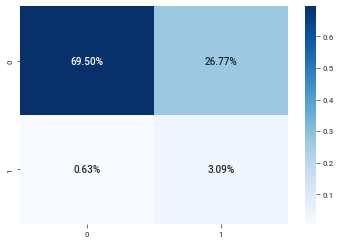

In [1164]:
import seaborn as sns
sns.heatmap(recall1_cm/np.sum(recall1_cm), annot=True,fmt='.2%', cmap='Blues')

In [1174]:
md(f"""
The graph above is based on the test set which includes 50% of our data. ({total_customers} customers) <br> 
We have {true_positive_recall1_cm } True Positives — these are the customers for which we will be able to extend the lifetime value. If we wouldn’t have predicted, then there was no opportunity for intervention.<br>
We also have {false_positive_recall1_cm } ({round((false_positive_recall1_cm /total_customers)*100,2)}%) False Positives where we will lose money because the promotion offered to these customers will just be an extra cost.<br>
{true_negative_recall1_cm } ({round((true_negative_recall1_cm /total_customers)*100,2)}%) are True Negatives (good customers) and {false_negative_recall1_cm } ({round((false_negative_recall1_cm /total_customers)*100,2)}%) are False Negative (this is a missed opportunity).<br>

In a churn model, often the reward of true positives is way different than the cost of false positives. Let’s use the following assumptions:<br>
- 5 months of free TechSupport or 250 SEK voucher(their choice) will be offered to all the customers identified as churn (True Positive + False Positive):<br>
- If we are able to stop the churn, we will gain {lifetime_charge} SEK per customer in customer lifetime value.<br>

Using these assumptions and the confusion matrix above, we can calculate the impact of this model:

Model: 
| Description   | Customers       | Worth(SEK)    | Total(SEK)             | - |
|---------------|-----------------|---------------|------------------------|---|
| True Positive | {true_positive_recall1_cm } | {lifetime_charge }    | {tp_total_recall1_cm }             | - |
| TP + FP       | {tp_fp_recall1_cm }         | -{voucher} | -{tp_fp_total_recall1_cm }          | - |
| -             | -               | **"PROFIT"-->**             | **{total_profit_recall1_cm } SEK** | - |

This model was the best of the worst.<br>
Profit is Profit.
"""
   )


The graph above is based on the test set which includes 50% of our data. (2682 customers) <br> 
We have 83 True Positives — these are the customers for which we will be able to extend the lifetime value. If we wouldn’t have predicted, then there was no opportunity for intervention.<br>
We also have 718 (26.77%) False Positives where we will lose money because the promotion offered to these customers will just be an extra cost.<br>
1864 (69.5%) are True Negatives (good customers) and 17 (0.63%) are False Negative (this is a missed opportunity).<br>

In a churn model, often the reward of true positives is way different than the cost of false positives. Let’s use the following assumptions:<br>
- 5 months of free TechSupport or 250 SEK voucher(their choice) will be offered to all the customers identified as churn (True Positive + False Positive):<br>
- If we are able to stop the churn, we will gain 2555 SEK per customer in customer lifetime value.<br>

Using these assumptions and the confusion matrix above, we can calculate the impact of this model:

Model: 
| Description   | Customers       | Worth(SEK)    | Total(SEK)             | - |
|---------------|-----------------|---------------|------------------------|---|
| True Positive | 83 | 2555    | 212065             | - |
| TP + FP       | 801         | -250 | -200250          | - |
| -             | -               | **"PROFIT"-->**             | **11815 SEK** | - |

This model was the best of the worst.<br>
Profit is Profit.
